In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

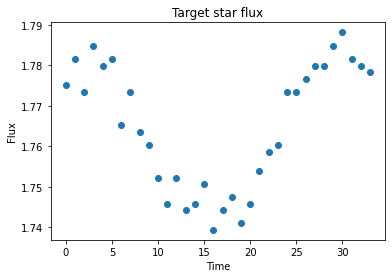

In [11]:
# Constants
distance_t = 233  # Distance to target star in parsecs
distance_c = 1e11  # Distance to comparison star in parsecs
M_sun = 4.83
parsec_to_m = 3.0857e+16
t = np.arange(0, 34, 1)

target = np.loadtxt("target.dat", usecols=[4], unpack=True)
comp = np.loadtxt("comparison.dat", usecols=[4], unpack=True)

diff_flux = []
target_flux_ = []
comp_flux_ = []

for i in range(len(target)):
    comp_apparent_magnitude = comp[i]
    comp_absolute_magnitude = comp_apparent_magnitude - 5 * math.log10(distance_c) + 5
    comp_luminosity = 10 ** ((M_sun - comp_absolute_magnitude) / 2.5)
    comp_flux = comp_luminosity * 3.828e+26 / (4 * math.pi * (distance_c * parsec_to_m) ** 2)

    target_apparent_magnitude = target[i]
    target_absolute_magnitude = target_apparent_magnitude - 5 * math.log10(distance_t) + 5
    target_luminosity = 10 ** ((M_sun - target_absolute_magnitude) / 2.5)
    target_flux = target_luminosity * 3.828e+26 / (4 * math.pi * (distance_t * parsec_to_m) ** 2)

    diff_flux.append(target_flux / comp_flux)
    target_flux_.append(target_flux)
    comp_flux_.append(comp_flux)

plt.scatter(t, diff_flux)
plt.xlabel("Time")
plt.ylabel("Flux")
plt.title("Target star flux")
plt.show()